## Import necessary libraries

In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import os
import itertools
import datetime
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Data Augmentation

Define directories for dataset

In [7]:
dataset_dir = 'Fruit And Vegetable Diseases Dataset'

Balance the dataset by oversampling

In [8]:
def oversample_dataset(directory, target_size):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    class_folders = os.listdir(directory)

    for folder in class_folders:
        path = os.path.join(directory, folder)
        images = [os.path.join(path, img) for img in os.listdir(path)]

        # Check if oversampling is needed for the current class
        if len(images) < target_size:
            samples_to_add = target_size - len(images)
            if samples_to_add > 0:
                # Apply data augmentation for oversampling
                augmentation_gen = datagen.flow_from_directory(
                    directory=directory,
                    classes=[folder],
                    target_size=(224, 224),
                    batch_size=samples_to_add,
                    class_mode='categorical'
                )

                num_generated_images = 0
                while num_generated_images < samples_to_add:
                    batch = augmentation_gen.next()
                    num_batch_images = batch[0].shape[0]
                    for i in range(num_batch_images):
                        if num_generated_images >= samples_to_add:
                            break

                        fruit_name = folder

                        image = batch[0][i].squeeze()
                        image_filename = f'{fruit_name}_augmented_{num_generated_images}.jpg'
                        tf.keras.preprocessing.image.save_img(os.path.join(path, image_filename), image)
                        images.append(os.path.join(path, image_filename))
                        num_generated_images += 1

Balance and oversample the dataset

In [12]:
target_size = 2000
oversample_dataset(dataset_dir, target_size)

Found 1641 images belonging to 1 classes.
Found 611 images belonging to 1 classes.
Found 591 images belonging to 1 classes.
Found 579 images belonging to 1 classes.
Found 619 images belonging to 1 classes.
Found 608 images belonging to 1 classes.
Found 593 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 1813 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Found 614 images belonging to 1 classes.


C:\Users\PMLS\anaconda3\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Found 584 images belonging to 1 classes.
Found 1603 images belonging to 1 classes.
Found 1596 images belonging to 1 classes.
Found 604 images belonging to 1 classes.
Found 595 images belonging to 1 classes.


Seperate Train and Valid Dataset

In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(input_folder, output_folder, split_ratio):
    # List all subdirectories in the input folder
    subdirectories = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    # Iterate through each subdirectory
    for subdirectory in subdirectories:
        # Get the class/category name from the subdirectory path
        class_name = os.path.basename(subdirectory)

        # List all files in the current subdirectory
        files = [f.path for f in os.scandir(subdirectory) if f.is_file()]

        # Split files into training and testing sets
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42)

        # Create output folders for training and testing sets
        train_output_folder = os.path.join(output_folder, 'train', class_name)
        test_output_folder = os.path.join(output_folder, 'valid', class_name)
        os.makedirs(train_output_folder, exist_ok=True)
        os.makedirs(test_output_folder, exist_ok=True)

        # Copy training files to the training output folder
        for train_file in train_files:
            shutil.copy(train_file, train_output_folder)

        # Copy testing files to the testing output folder
        for test_file in test_files:
            shutil.copy(test_file, test_output_folder)

# Path to the output directory where the train and valid folders will be created
output_dir = 'Fruit And Veg Diseases Dataset'
split_ratio = 0.2  # Adjust the split ratio as needed

split_data(dataset_dir, output_dir, split_ratio)

# Step 2: Data Preparation

Define directories for training and testing data

In [1]:
train_dir = 'Fruit And Veg Diseases Dataset/train'
test_dir = 'Fruit And Veg Diseases Dataset/valid'

In [4]:
from PIL import Image
import os

def filter_images_by_format(directory, allowed_formats):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Open the image to check its format
                with Image.open(file_path) as img:
                    img_format = img.format.upper()

                # Check if the format is not in the allowed_formats list
                if img_format not in allowed_formats:
                    print(f"Deleting {file_path} (unsupported format: {img_format})")
                    os.remove(file_path)

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Specify the allowed image formats
allowed_formats = ['JPEG', 'PNG', 'JPG', 'GIF', 'BMP']

# Apply the filter to the training directory
filter_images_by_format(train_dir, allowed_formats)

# Apply the filter to the testing directory
filter_images_by_format(test_dir, allowed_formats)

Deleting Fruit And Veg Diseases Dataset/train\Potato__Rotten\rottenPotato (1).webp (unsupported format: WEBP)
Deleting Fruit And Veg Diseases Dataset/train\Tomato__Rotten\rottenTomato (1).webp (unsupported format: WEBP)
Deleting Fruit And Veg Diseases Dataset/valid\Banana__Healthy\freshBanana (1).webp (unsupported format: WEBP)
Deleting Fruit And Veg Diseases Dataset/valid\Banana__Rotten\rottenBanana (1).webp (unsupported format: WEBP)
Deleting Fruit And Veg Diseases Dataset/valid\Carrot__Healthy\freshCarrot (415).jpg (unsupported format: WEBP)


In [10]:
train_dir = 'Fruit And Veg Diseases Dataset/train'
test_dir = 'Fruit And Veg Diseases Dataset/valid'

Create image datasets for training and testing

In [11]:
train_data = keras.utils.image_dataset_from_directory(train_dir,
                                             image_size=(224, 224),
                                             label_mode='categorical',
                                             batch_size=32)

Found 46924 files belonging to 28 classes.


In [12]:
test_data = keras.utils.image_dataset_from_directory(test_dir,
                                         image_size=(224, 224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 11734 files belonging to 28 classes.


Define class names based on the directory structure

In [13]:
class_names = train_data.class_names
class_names

['Apple__Healthy',
 'Apple__Rotten',
 'Banana__Healthy',
 'Banana__Rotten',
 'Bellpepper__Healthy',
 'Bellpepper__Rotten',
 'Carrot__Healthy',
 'Carrot__Rotten',
 'Cucumber__Healthy',
 'Cucumber__Rotten',
 'Grape__Healthy',
 'Grape__Rotten',
 'Guava__Healthy',
 'Guava__Rotten',
 'Jujube__Healthy',
 'Jujube__Rotten',
 'Mango__Healthy',
 'Mango__Rotten',
 'Orange__Healthy',
 'Orange__Rotten',
 'Pomegranate__Healthy',
 'Pomegranate__Rotten',
 'Potato__Healthy',
 'Potato__Rotten',
 'Strawberry__Healthy',
 'Strawberry__Rotten',
 'Tomato__Healthy',
 'Tomato__Rotten']

# Step 2: Model Creation

Define the input image shape

In [14]:
image_shape = (224, 224, 3)

Create a base model (EfficientNetB0) for feature extraction

In [15]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
base_model.trainable = False



16705208/16705208 [==============================] - 19s 1us/step


Create the main model by adding layers on top of the base model

In [16]:
inputs = layers.Input(shape=image_shape, name='input_layer')
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)
outputs = layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
feature_model = tf.keras.Model(inputs, outputs, name='Fruit_Vegetable_Diseases_Detection_Model')

Set some layers in the base model as trainable

In [17]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

Compile the model

In [18]:
feature_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [19]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

 y)                                                                  'block2a_se_expand[0][0]']   
                                                                                                  
 block2a_project_conv (Conv  (None, None, None, 24)       2304      ['block2a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block2a_project_bn (BatchN  (None, None, None, 24)       96        ['block2a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block2b_expand_conv (Conv2  (None, None, None, 144)      3456      ['block2a_project_bn[0][0]']  
 D)                                                                                               
          

                                                                                                  
 block3a_project_conv (Conv  (None, None, None, 40)       5760      ['block3a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block3a_project_bn (BatchN  (None, None, None, 40)       160       ['block3a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block3b_expand_conv (Conv2  (None, None, None, 240)      9600      ['block3a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block3b_e

 block4a_project_conv (Conv  (None, None, None, 80)       19200     ['block4a_se_excite[0][0]']   
 2D)                                                                                              
                                                                                                  
 block4a_project_bn (BatchN  (None, None, None, 80)       320       ['block4a_project_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 block4b_expand_conv (Conv2  (None, None, None, 480)      38400     ['block4a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block4b_expand_bn (BatchNo  (None, None, None, 480)      1920      ['block4b_expand_conv[0][0]'] 
 rmalizati

 ormalization)                                                                                    
                                                                                                  
 block4c_drop (Dropout)      (None, None, None, 80)       0         ['block4c_project_bn[0][0]']  
                                                                                                  
 block4c_add (Add)           (None, None, None, 80)       0         ['block4c_drop[0][0]',        
                                                                     'block4b_add[0][0]']         
                                                                                                  
 block5a_expand_conv (Conv2  (None, None, None, 480)      38400     ['block4c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5a_e

 block5b_add (Add)           (None, None, None, 112)      0         ['block5b_drop[0][0]',        
                                                                     'block5a_project_bn[0][0]']  
                                                                                                  
 block5c_expand_conv (Conv2  (None, None, None, 672)      75264     ['block5b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block5c_expand_bn (BatchNo  (None, None, None, 672)      2688      ['block5c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5c_expand_activation   (None, None, None, 672)      0         ['block5c_expand_bn[0][0]']   
 (Activati

 ormalization)                                                                                    
                                                                                                  
 block6b_expand_conv (Conv2  (None, None, None, 1152)     221184    ['block6a_project_bn[0][0]']  
 D)                                                                                               
                                                                                                  
 block6b_expand_bn (BatchNo  (None, None, None, 1152)     4608      ['block6b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6b_expand_activation   (None, None, None, 1152)     0         ['block6b_expand_bn[0][0]']   
 (Activation)                                                                                     
          

 block6c_add (Add)           (None, None, None, 192)      0         ['block6c_drop[0][0]',        
                                                                     'block6b_add[0][0]']         
                                                                                                  
 block6d_expand_conv (Conv2  (None, None, None, 1152)     221184    ['block6c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block6d_expand_bn (BatchNo  (None, None, None, 1152)     4608      ['block6d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6d_expand_activation   (None, None, None, 1152)     0         ['block6d_expand_bn[0][0]']   
 (Activati

                                                                                                  
 top_bn (BatchNormalization  (None, None, None, 1280)     5120      ['top_conv[0][0]']            
 )                                                                                                
                                                                                                  
 top_activation (Activation  (None, None, None, 1280)     0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
Total params: 4049571 (15.45 MB)
Trainable params: 1350960 (5.15 MB)
Non-trainable params: 2698611 (10.29 MB)
__________________________________________________________________________________________________


# Step 3: Model Training

Create a function to set up TensorBoard logging

In [20]:
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

Set up callbacks for training

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, verbose=1, min_lr=1e-7)
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor="val_loss"
)

Train the model with early stopping, learning rate reduction, and checkpointing

In [22]:
epochs = 10
history = feature_model.fit(train_data, epochs=epochs,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks=[early_stopping, model_checkpoint, reduce_lr,
                                       create_tensorboard_callback('Fruit_Vegetable_Diseases_Detection_Model', 'EfficientNetB010')]
)

Saving TensorBoard log files to: Fruit_Vegetable_Diseases_Detection_Model/EfficientNetB010/20231115-180057
Epoch 1/10


1467/1467 [==============================] - 1524s 1s/step - loss: 0.2617 - accuracy: 0.9256 - val_loss: 0.0801 - val_accuracy: 0.9741 - lr: 1.0000e-04
Epoch 2/10
1467/1467 [==============================] - 1520s 1s/step - loss: 0.0423 - accuracy: 0.9873 - val_loss: 0.0436 - val_accuracy: 0.9864 - lr: 1.0000e-04
Epoch 3/10
1467/1467 [==============================] - 1543s 1s/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0339 - val_accuracy: 0.9886 - lr: 1.0000e-04
Epoch 4/10
1467/1467 [==============================] - 1498s 1s/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.0392 - val_accuracy: 0.9882 - lr: 1.0000e-04
Epoch 5/10
1467/1467 [==============================] - 1469s 1s/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.0313 - val_accuracy: 0.9906 - lr: 1.0000e-04
Epoch 6/10
1467/1467 [==============================] - 1462s 996ms/step - l

# Step 4: Model Evaluation

Load the best model checkpoint

In [23]:
feature_model.load_weights(checkpoint_path)

Evaluate the model on the test data

In [24]:
test_loss, test_accuracy = feature_model.evaluate(test_data)

367/367 [==============================] - 270s 735ms/step - loss: 0.0189 - accuracy: 0.9946


Print the evaluation results

In [25]:
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Loss: 0.02
Test Accuracy: 99.46%


# Step 5: Data Visualization and Model Metrics

Define a function to plot training history

In [26]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = history.epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Plot the training history

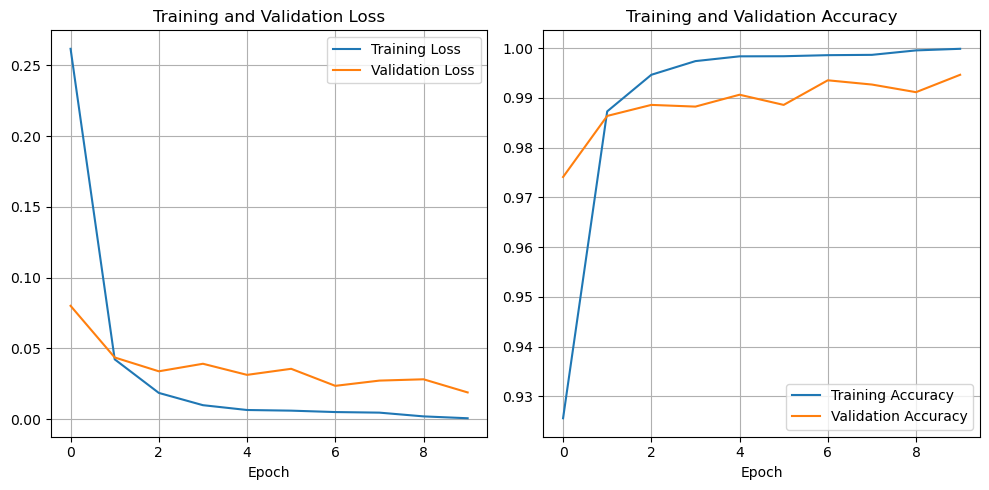

In [27]:
plot_history(history)

Calculate additional metrics for model evaluation

In [28]:
from sklearn.metrics import classification_report

def calculate_metrics(model, test_data):
    y_true = []
    y_pred = []

    for images, labels in test_data:
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(model.predict(images), axis=1))

    return y_true, y_pred

In [29]:
y_true, y_pred = calculate_metrics(feature_model, test_data)

1/1 [==============================] - 1s 701ms/step


1/1 [==============================] - 1s 764ms/step


1/1 [==============================] - 2s 2s/step


Print classification report

In [30]:
print(classification_report(y_true, y_pred, target_names=class_names))

                      precision    recall  f1-score   support

      Apple__Healthy       1.00      1.00      1.00       488
       Apple__Rotten       1.00      0.98      0.99       586
     Banana__Healthy       1.00      1.00      1.00       399
      Banana__Rotten       1.00      1.00      1.00       559
 Bellpepper__Healthy       1.00      1.00      1.00       400
  Bellpepper__Rotten       0.97      0.99      0.98       400
     Carrot__Healthy       0.97      0.99      0.98       399
      Carrot__Rotten       0.99      0.96      0.98       400
   Cucumber__Healthy       0.99      1.00      1.00       400
    Cucumber__Rotten       0.99      0.99      0.99       400
      Grape__Healthy       1.00      1.00      1.00       400
       Grape__Rotten       1.00      1.00      1.00       400
      Guava__Healthy       1.00      1.00      1.00       400
       Guava__Rotten       1.00      1.00      1.00       400
     Jujube__Healthy       1.00      1.00      1.00       400
      J

Compute the confusion matrix

In [31]:
confusion = confusion_matrix(y_true, y_pred)

Plot the confusion matrix

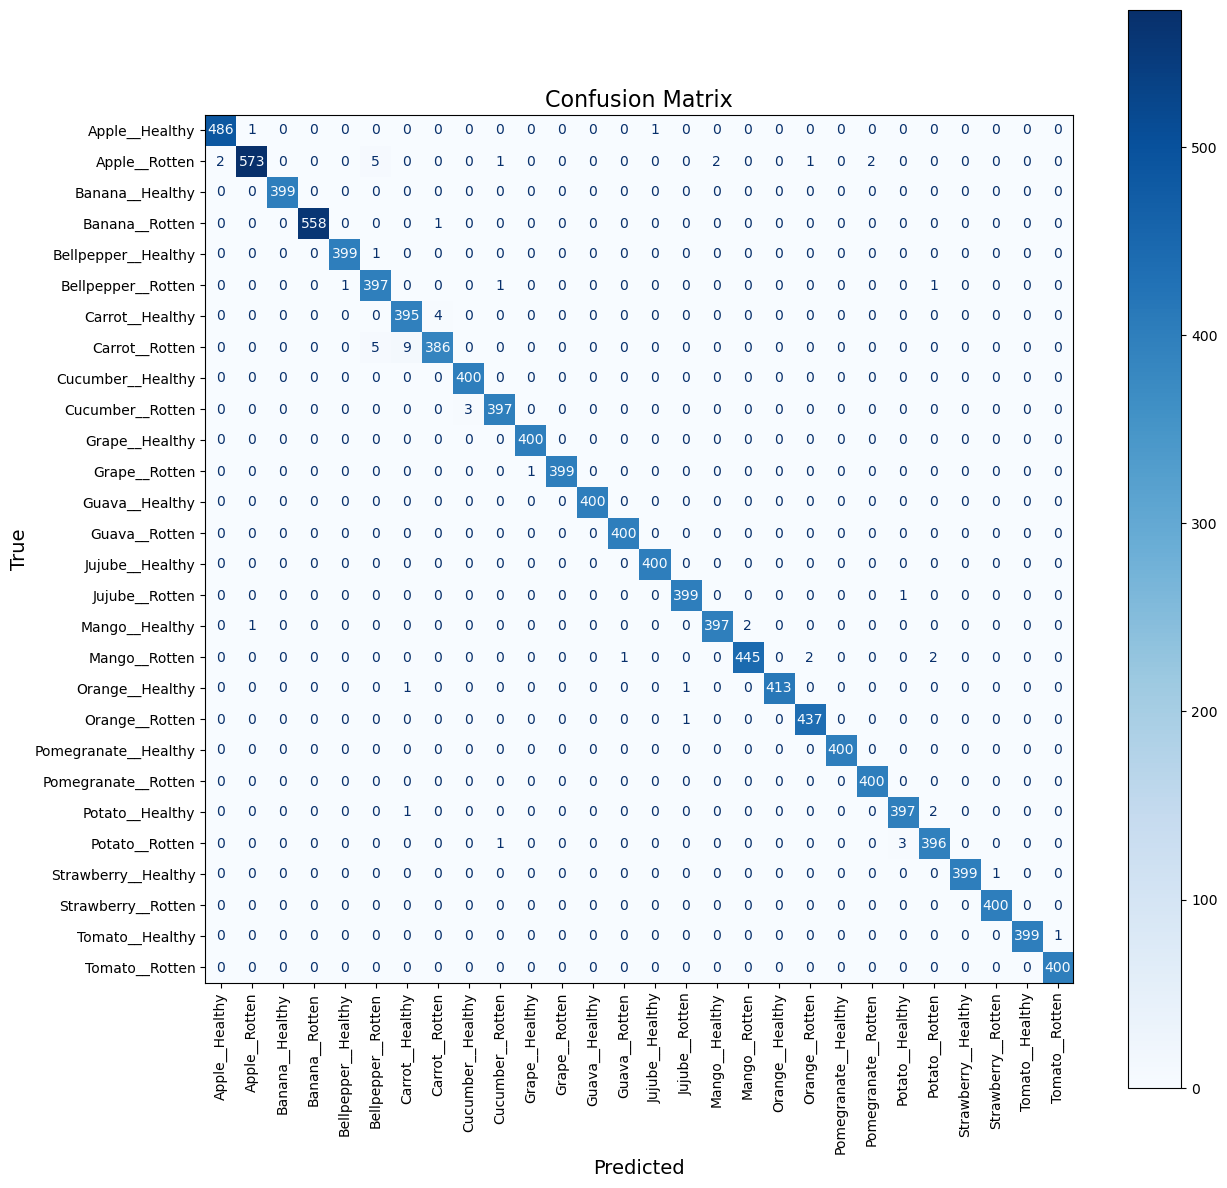

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(confusion, class_names):
    num_classes = len(class_names)
    fig, ax = plt.subplots(figsize=(14, 14))

    # Convert the confusion matrix values to integers
    confusion = confusion.astype(int)

    disp = ConfusionMatrixDisplay(confusion, display_labels=class_names)
    disp = disp.plot(cmap=plt.get_cmap("Blues"), values_format="d", ax=ax)

    # Rotate y-axis class names to be straight at 90 degrees
    ax.set_yticklabels(class_names, rotation=0, fontsize=10)

    # Set the tick labels and fontsize for x-axis
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, class_names, rotation=90, fontsize=10)

    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("True", fontsize=14)
    plt.show()

plot_confusion_matrix(confusion, class_names)

# Step 6: Save Model

In [33]:
tf.saved_model.save(feature_model, 'fruit_vegetable_disease_detection_model')

INFO:tensorflow:Assets written to: fruit_vegetable_disease_detection_model\assets


INFO:tensorflow:Assets written to: fruit_vegetable_disease_detection_model\assets


In [34]:
h5_model_path = 'fruit_vegetable_disease_detection_model.h5'
feature_model.save(h5_model_path)

C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
tflite_model_path = 'fruit_vegetable_disease_detection_model.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(feature_model)
tflite_model = converter.convert()

with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\PMLS\AppData\Local\Temp\tmpqqb4bq3y\assets


INFO:tensorflow:Assets written to: C:\Users\PMLS\AppData\Local\Temp\tmpqqb4bq3y\assets


# Step 7: Image Prediction

Define a function to load and preprocess an image

In [106]:
def load_prep(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=(224, 224))
    return img

Load and preprocess an image, and make a prediction

Text(0.5, 0.98, '(224, 224, 3)')

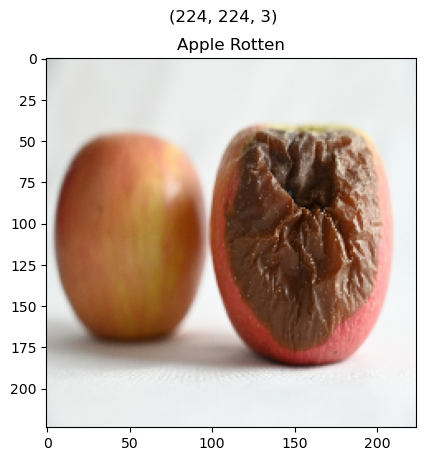

In [107]:
image = load_prep('test/Apple Rotten 1.jpg')
plt.imshow(image / 255.)
plt.title('Apple Rotten')
plt.suptitle(image.shape)

In [108]:
pred = feature_model.predict(tf.expand_dims(image, axis=0))
predicted_class = class_names[pred.argmax()]
predicted_prob = pred.max()

1/1 [==============================] - 1s 883ms/step


Print the predicted class and probability

In [109]:
print(f'Predicted Class: {predicted_class}')
print(f'Predicted Probability: {predicted_prob * 100:.2f}%')

Predicted Class: Apple__Rotten
Predicted Probability: 100.00%


Define a function to randomly select an image from the test data and make a prediction


In [110]:
def random_image_predict(model, test_dir=test_dir, class_names=class_names, rand_class=True, cls_name=None):
    if rand_class:
        ran_cls = random.randint(0, len(class_names) - 1)
        cls = class_names[ran_cls]
        
        # Get a list of all files in the class directory
        class_dir = os.path.join(test_dir, cls)
        files = os.listdir(class_dir)

        # Choose a random file from the list
        random_file = random.choice(files)

        # Create the full path to the random file
        ran_path = os.path.join(class_dir, random_file)
    else:
        cls = class_names[cls_name]
        
        # Get a list of all files in the class directory
        class_dir = os.path.join(test_dir, cls)
        files = os.listdir(class_dir)

        # Choose a random file from the list
        random_file = random.choice(files)

        # Create the full path to the random file
        ran_path = os.path.join(class_dir, random_file)

    prep_img = load_prep(ran_path)

    pred = model.predict(tf.expand_dims(prep_img, axis=0))
    pred_cls = class_names[pred[0].argmax()]
    pred_percent = pred[0][pred[0].argmax()] * 100
    plt.imshow(prep_img / 255.)
    if pred_cls == cls:
        c = 'g'
    else:
        c = 'r'
    plt.title(f'Actual: {cls}\nPredicted: {pred_cls}\nProbability: {pred_percent:.2f}%', color=c, fontdict={'fontsize': 10})
    plt.axis(False)

Display 9 randomly predicted images from the test data

1/1 [==============================] - 0s 231ms/step


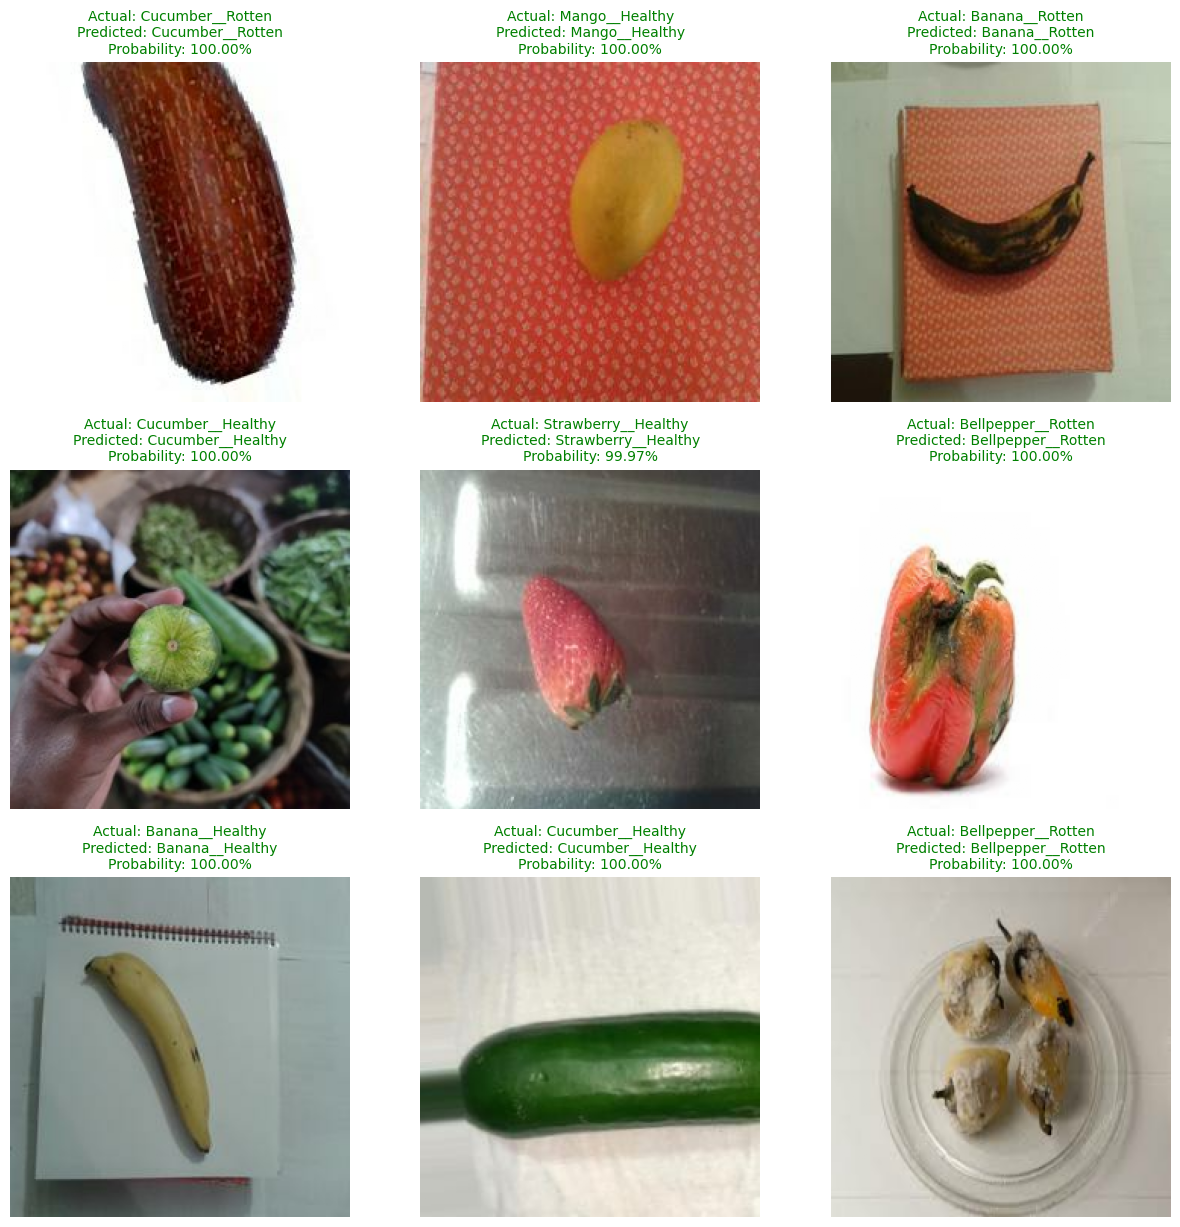

In [111]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    random_image_predict(feature_model, test_dir)

Define a directory containing images for prediction

1/1 [==============================] - 0s 234ms/step


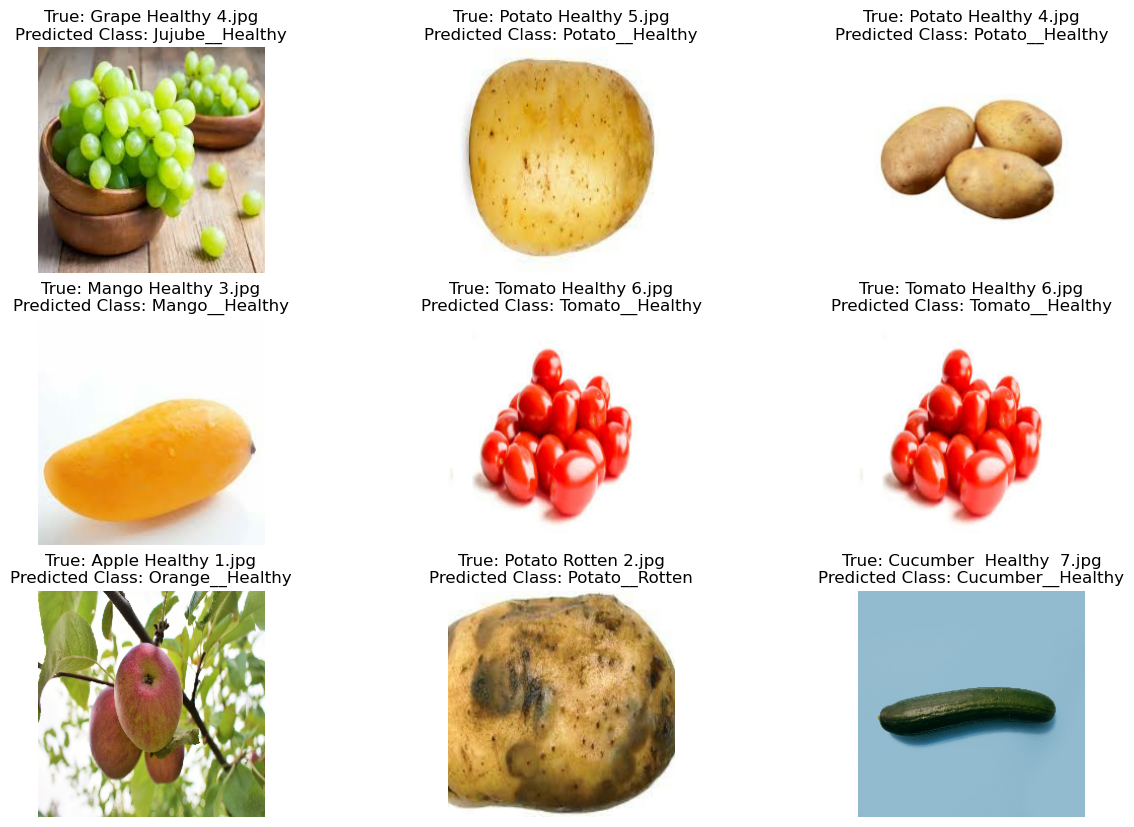

In [112]:
data_dir = 'test'
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    rn = random.choice(os.listdir(data_dir))
    image_path = os.path.join(data_dir, rn)
    img = load_prep(image_path)
    pred = feature_model.predict(tf.expand_dims(img, axis=0))
    pred_name = class_names[pred.argmax()]
    plt.imshow(img / 255.)
    plt.title(f'True: {rn}\nPredicted Class: {pred_name}')
    plt.axis(False)

Define a function to predict an image from a given path

In [113]:
def predict_img(img_path, model=feature_model):
    img = load_prep(img_path)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_name = class_names[pred.argmax()]
    plt.imshow(img / 255.)
    plt.title(f'Predicted Class: {pred_name}')
    plt.axis(False)

# Step 9: Image Prediction for load Crop Diseases Detection model

In [141]:
loaded_model = tf.saved_model.load('fruit_vegetable_disease_detection_model')

Define a function to load and preprocess an image

In [147]:
def load_prep(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=(224, 224))
    return img

Define the directory containing the images for prediction

In [148]:
test_directory = 'test'

Get a list of image file paths

In [149]:
image_paths = [os.path.join(test_directory, img) for img in os.listdir(test_directory)]

Make predictions on each image

In [150]:
predictions = []

for img_path in image_paths:
    img = load_prep(img_path)
    img = tf.expand_dims(img, axis=0)

    # Run inference using the loaded model
    prediction = loaded_model(img)
    predicted_class = class_names[np.argmax(prediction)]
    predictions.append((img_path, predicted_class))

Display the predictions

In [151]:
for img_path, predicted_class in predictions:
    print(f'Image: {os.path.basename(img_path)} - Predicted Class: {predicted_class}')

Image: Apple Healthy 1.jpg - Predicted Class: Orange__Healthy
Image: Apple Healthy 2.jpg - Predicted Class: Potato__Healthy
Image: Apple Healthy 3.jpg - Predicted Class: Apple__Healthy
Image: Apple Healthy 4.jpg - Predicted Class: Apple__Healthy
Image: Apple Healthy 5.jpg - Predicted Class: Strawberry__Healthy
Image: Apple Healthy 6.jpg - Predicted Class: Apple__Healthy
Image: Apple Rotten 1.jpg - Predicted Class: Apple__Rotten
Image: Apple Rotten 2.jpg - Predicted Class: Apple__Rotten
Image: Apple Rotten 3.jpg - Predicted Class: Apple__Rotten
Image: Apple Rotten 4.jpg - Predicted Class: Apple__Rotten
Image: Apple Rotten 5.jpg - Predicted Class: Tomato__Rotten
Image: Apple Rotten 6.jpg - Predicted Class: Apple__Rotten
Image: Banana Healthy 1.jpg - Predicted Class: Banana__Healthy
Image: Banana Healthy 2.jpg - Predicted Class: Banana__Healthy
Image: Banana Healthy 3.jpg - Predicted Class: Banana__Healthy
Image: Banana Healthy 4.jpg - Predicted Class: Banana__Healthy
Image: Banana Health